In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [2]:
import torch
torch.cuda.set_device(0)
device = torch.device('cuda:0')

In [3]:
import pandas as pd
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader
import math
import json
import time
from matplotlib.pylab import plt
%matplotlib inline 
import itertools

class testMotionData(Dataset):

    def __init__(self, df, users, root_dir = '/home/jupyter/park/', transform=None):
      
        self.dataset = df
        self.root_dir = root_dir
        self.dataArray = []
        self.resultArray = []
        iterData = iter(self.dataset.iterrows())

        k = 0

        for j,z in zip(iterData,tqdm(range(int(len(self.dataset))))):
          j = j[1]
          healthcode = j[3]
        
          label = users.loc[healthcode][0]
          
          #print(j)
          for i in [8]:
            if(not math.isnan(j[i])):
                filedir = str(int(j[i]/10000))
                filename = str(j[i])
                length = len(filename)
                filename = filename[0:length-2]

                if(os.path.isfile(self.root_dir+filedir+"/"+filename+".json"))|(os.path.isfile(self.root_dir+"data"+"/"+filename+".json")):
                  if(os.path.isfile(self.root_dir+filedir+"/"+filename+".json")):
                    f = open(self.root_dir+filedir+"/"+filename+".json")
                  else:
                    f = open(self.root_dir+"data/"+filename+".json")
                try:
                    data = json.load(f)
                except:
                    continue
                self.dataArray.append([])
                self.dataArray[k].append([])
                self.dataArray[k].append([])
                self.dataArray[k].append([])
                for i in range(0,len(data),2):
                      x = data[i].get("rotationRate")
#                       print(i)
                      self.dataArray[k][0].append(x["x"])
                      self.dataArray[k][1].append(x["y"])
                      self.dataArray[k][2].append(x["z"])
            
                stdev = np.std(np.asarray(self.dataArray[k]))
                mean = np.mean(np.asarray(self.dataArray[k]))
                self.dataArray[k] = ((np.asarray(self.dataArray[k])-mean)/stdev).tolist()
                        
                self.dataArray[k][0] = correct_batch(self.dataArray[k][0])
                self.dataArray[k][1] = correct_batch(self.dataArray[k][1])
                self.dataArray[k][2] = correct_batch(self.dataArray[k][2])
                
                
                

                if(label):
                  self.resultArray.append(1)
                else:
                  self.resultArray.append(0)
                

                k = k + 1



        self.dataArray = np.asarray(self.dataArray)
        unique, counts = np.unique(np.array(self.resultArray), return_counts=True)
        print(dict(zip(unique, counts)))



    def __len__(self):
        return len(self.resultArray)

    def __getitem__(self, idx):
        sample = {'data': self.dataArray[idx], 'result': self.resultArray[idx]}

        return sample

def trans_equal(ten,length=1000):
    return torch.tensor([pad_zero(ten[0][0].cpu().numpy(),length),pad_zero(ten[0][1].cpu().numpy(),length),pad_zero(ten[0][2].cpu().numpy(),length)])

def pad_zero(arr,length):
    while(len(arr)<length):
        arr = np.append(arr,0)
    return arr[:length]

In [4]:
dataloader = torch.load("/home/anasa2/originalParkinsonsDataloaders/val_loader.pth")

In [13]:
itr = iter(dataloader)

In [14]:
batch = itr.next()
X = batch["data"]
y = batch["result"]

In [15]:
while(True):
    try: 
        batch = next(itr) 
    except:
        break 

    X  = torch.cat((X, batch["data"]), dim=0)
    y  = torch.cat((y, batch["result"]), dim=0)

In [16]:
X = torch.FloatTensor(X.cpu().float())

In [17]:
print(X.shape)
print(y.shape)

torch.Size([4137, 3, 4000])
torch.Size([4137])


Size of the dataframe: (1000, 12002)


In [109]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [110]:
print(df[feat_cols])

pixel0           pixel1           pixel2           pixel3  \
0    tensor(-1.4005)  tensor(-0.2085)  tensor(-3.7769)  tensor(-0.8822)   
1     tensor(2.9850)   tensor(4.4572)   tensor(2.7394)   tensor(0.3887)   
2     tensor(0.2768)   tensor(0.1361)  tensor(-0.0255)  tensor(-0.1476)   
3     tensor(1.3884)   tensor(0.5041)   tensor(1.5021)   tensor(2.1211)   
4     tensor(9.2766)   tensor(5.7429)  tensor(-0.0319)  tensor(-2.8367)   
..               ...              ...              ...              ...   
995  tensor(-2.4447)  tensor(-3.2611)  tensor(-5.3712)  tensor(-5.7428)   
996  tensor(-2.1271)  tensor(-2.2235)  tensor(-2.4375)  tensor(-2.6410)   
997   tensor(0.2108)  tensor(-0.7070)  tensor(-0.5886)  tensor(-0.1871)   
998   tensor(0.1617)   tensor(0.1442)   tensor(0.0894)   tensor(0.0707)   
999   tensor(0.4782)   tensor(4.2887)   tensor(3.0496)   tensor(1.0837)   

              pixel4           pixel5           pixel6           pixel7  \
0     tensor(1.5805)   tensor(2.3576) 

In [121]:
pca = PCA(n_components=100)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.08619015 0.03022771 0.02960708 0.02667661 0.02172304 0.02019823
 0.01946314 0.01884089 0.0168344  0.0143971  0.01363333 0.01319304
 0.01268091 0.01171069 0.01137887 0.01073081 0.01028027 0.01013855
 0.00955538 0.00899844 0.00884861 0.00842427 0.00818515 0.0077888
 0.00766729 0.00736322 0.00716541 0.00704081 0.00686988 0.00638541
 0.00613108 0.00601965 0.00581502 0.00573454 0.00559672 0.00548643
 0.00540221 0.00521113 0.00511843 0.00486475 0.0047716  0.00465047
 0.00463516 0.00453369 0.00442043 0.00431793 0.00429733 0.00426397
 0.00404048 0.00398734 0.00397067 0.00386579 0.00376827 0.00372164
 0.00368189 0.00353207 0.00346267 0.00341295 0.00337512 0.0033531
 0.0032843  0.00315498 0.00313659 0.00308348 0.00304018 0.00298511
 0.00292506 0.00289613 0.00286704 0.00282777 0.00279648 0.00271746
 0.00269086 0.00266015 0.00262689 0.00260875 0.00258843 0.00254388
 0.00250803 0.00245721 0.00240566 0.00234717 0.00234027 0.00233692
 0.00226679 0.00222

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

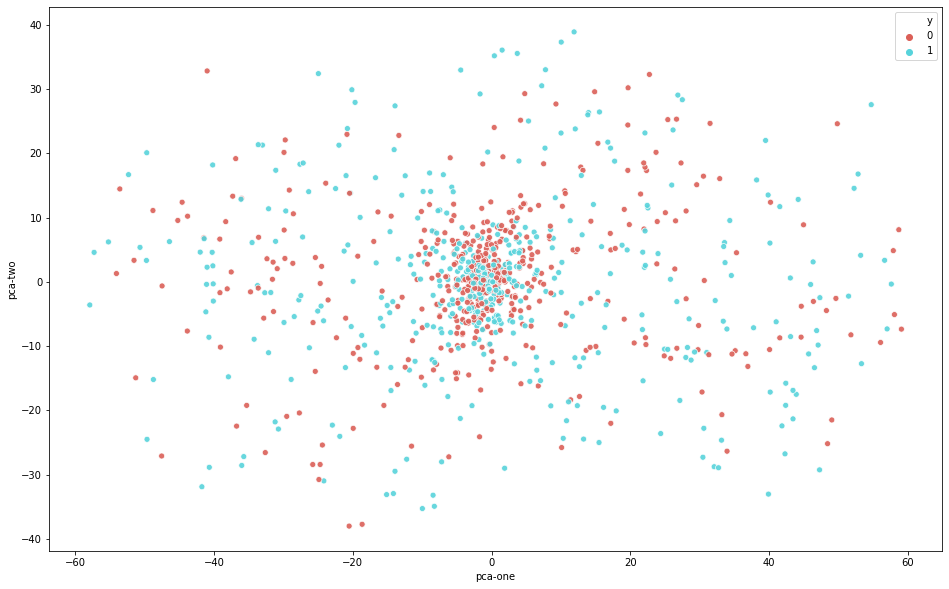

In [122]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.9
)

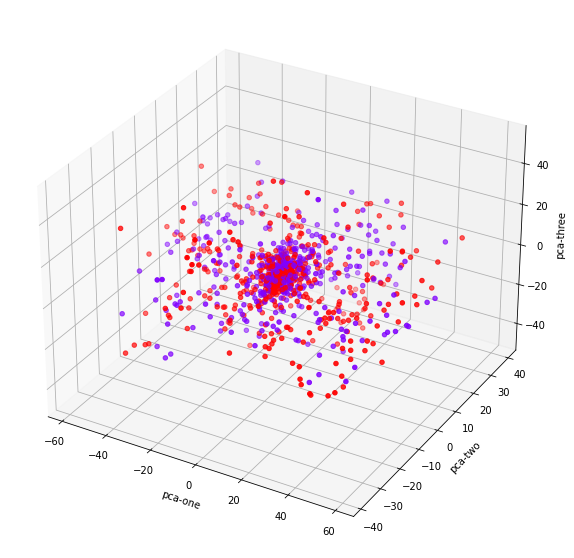

In [123]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='rainbow'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [124]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.08619015 0.03022769 0.02960708]


In [125]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.731s...
[t-SNE] Computed neighbors for 1000 samples in 18.154s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 18.742816
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.398590
[t-SNE] KL divergence after 300 iterations: 2.011959
t-SNE done! Time elapsed: 29.69832992553711 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

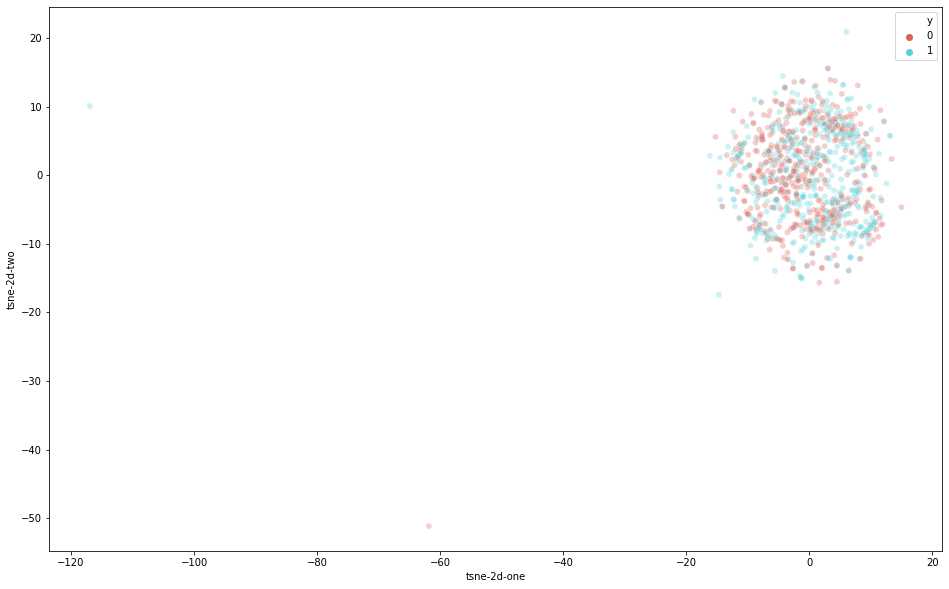

In [126]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

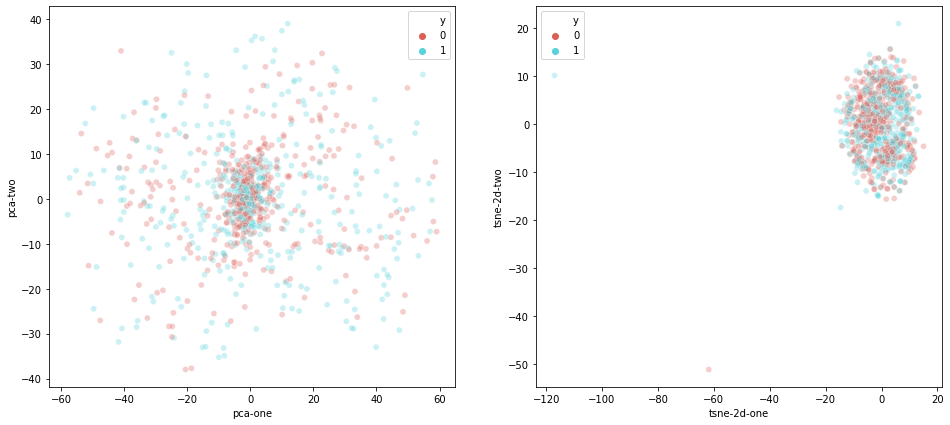

In [127]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [128]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.5713112997317706


In [129]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 1.202613353729248 seconds


<AxesSubplot:xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

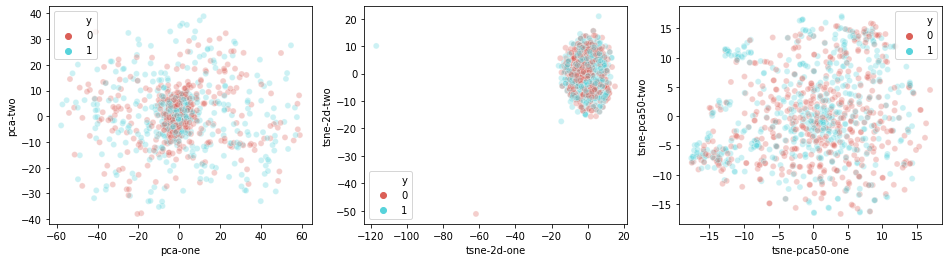

In [130]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

In [133]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()
writer.add_figure("pca-one and pca-two",ax1)
writer.add_figure("tsne-2d",ax2)
writer.add_figure("tsne-pca50",ax3)

AttributeError: 'AxesSubplot' object has no attribute 'set_canvas'

In [134]:
!tensorboard --logdir=runs

TensorFlow installation not found - running with reduced feature set.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.3.0 at http://localhost:6007/ (Press CTRL+C to quit)
^C
